In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pickle
import cv2
import numpy as np
from torchvision.transforms import functional as TF


In [30]:
GAN_path = "/home/daniel/divergent-nets/data/data_files/GAN_dict.pkl"
img_path = "/root/divergent-nets/data/data_files/cluster_30/cc_samples_dil.pkl"
styled_img_path = "/root/divergent-nets/data/data_files/cluster_30/cc_styled_samples_dil.pkl"
shape = (256, 256)

In [31]:
def shorten_key(key):
    return f".{key.split('diffusion-gen')[1]}"

def load_images_from_path(img_path, mask=False):
    conversion = "RGB" if not mask else "L"
    src_img_pil = Image.open(img_path).convert(conversion)
    src_img_pil = src_img_pil.resize(shape, Image.LANCZOS)  # type: ignore
    src_img = (
        TF.to_tensor(src_img_pil).unsqueeze(0)
    )
    return src_img
def prep_image_for_view(images, n=None):
    paths = []
    images_arr = []
    iters = images.items() if n is None else list(images.items())[20:20+n]
    for path, imgs in iters:
        paths.append(path)
        images_arr.append(imgs)
        batch_size = len(imgs)
    images = np.concatenate(images_arr, axis=0)
    # images = np.load(img_path)['arr_0']
    print(images.shape) # (N, 256, 256, C)
    images, masks = images[..., :3], images[..., 3]
    # Erosion of mask
    threshold = (masks.min() + masks.max()) / 2
    print("Threshold", threshold)
    masks = np.where(masks > threshold, 255, 0).astype(np.uint8)

    return batch_size, images, masks, paths

(15, 256, 256, 4)
Threshold 127.5
(15, 256, 256, 4)
Threshold 127.5
5
cju2hfqnmhisa0993gpleeldd.jpg
cju2i6acqvo6l0799u20fift8.jpg
cju2ma647l0nj0993ot4deq2q.jpg
cju2qozsk20cq0855ugrg3cri.jpg
cju2qs32r1vys07999conmbvx.jpg


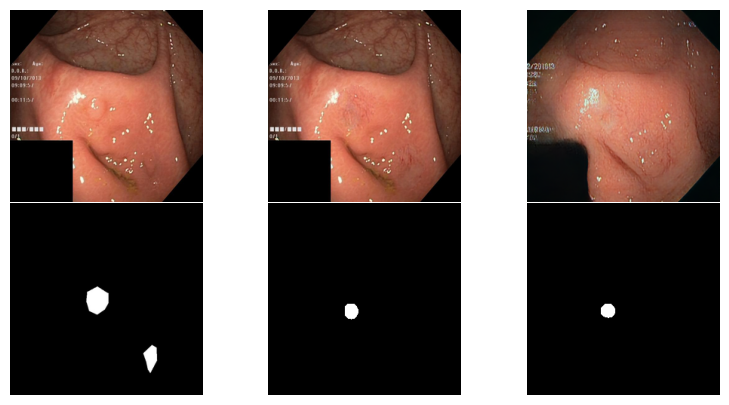

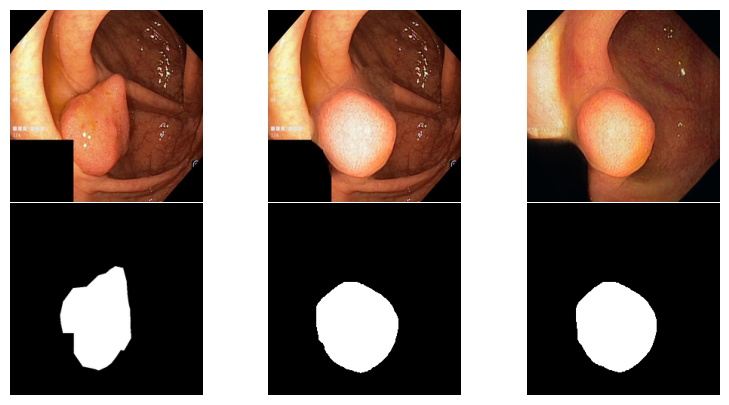

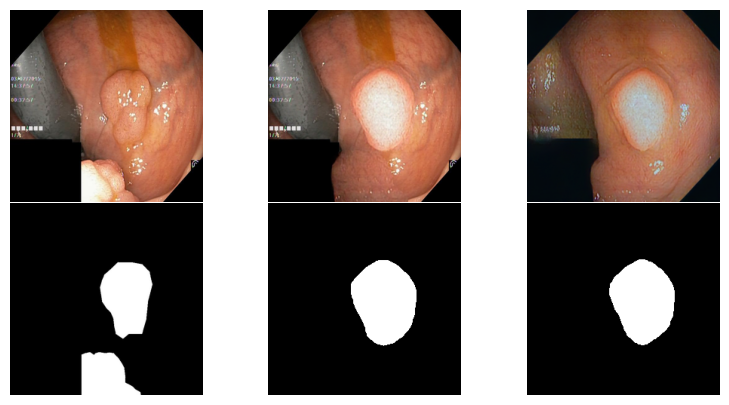

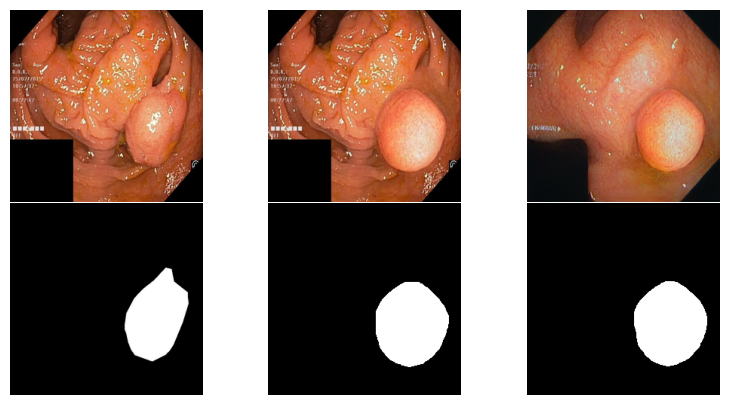

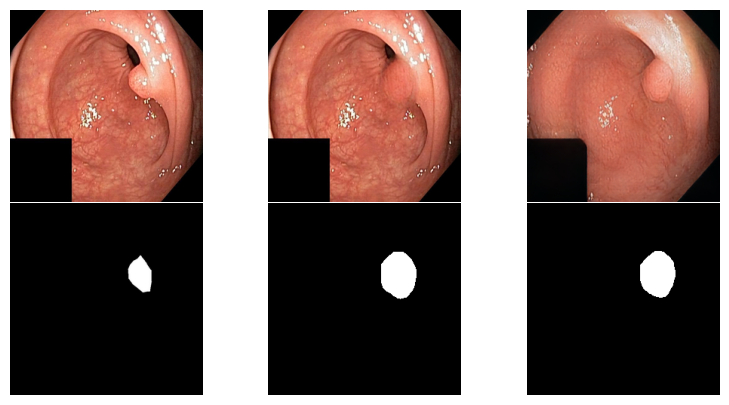

In [32]:
def show_image(img_path, styled_img_path):
    with open(img_path, "rb") as f:
        images = pickle.load(f)
    with open(styled_img_path, "rb") as f:
        styled_images = pickle.load(f)
    """
    images is a dictionary: {img_path: generated images}
    generated images has shape (N, 256, 256, 4)
    """
    iter = min(len(images), 5)
    batch_size, images, masks, paths = prep_image_for_view(images, iter)
    _, styled_images, styled_masks, _ = prep_image_for_view(styled_images, iter)
    # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (16, 16))
    # ppmask = cv2.morphologyEx(masks[0], cv2.MORPH_OPEN, kernel)
    # plt.imshow(ppmask, cmap="gray")
    #plt.imshow(images[-1])
    # images = [Image.fromarray(np.uint8(img)) for img in images]
    # masks = [Image.fromarray(np.uint8(m)) for m in mask]
    print(len(paths))
    for i in range(iter):
        # Denoise image
        # img =  cv2.fastNlMeansDenoisingColored(np.array(img), None, 10, 10, 7, 21)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = Image.fromarray(img)
        # Save the image
        # img.save(f"{img_dir}/{i}.png")
        # masks[i].save(f"{img_dir}/{i}_mask.png")
        # Set axis off
        # path = shorten_key(paths[i // batch_size])
        path = paths[i]
        # print(path)
        path = path.replace("guided_diffusion", "data/data_files")
        orig_img = load_images_from_path(path)
        orig_mask = load_images_from_path(path.replace("masked-images", "masks"))
        print(os.path.basename(path))

        # w, h = 3, 3
        sample_idx = i * batch_size + 1
        # dpi = 512
        # Plot original image, inpainted image, styled image, then masks below
        fig, ax = plt.subplots(2, 3, figsize=(10, 5), frameon=False)    
        ax[0, 0].imshow(orig_img[0].permute(1, 2, 0))
        # ax[0, 0].set_title("Original Image")
        ax[0, 0].axis("off")
        ax[0, 1].imshow(images[sample_idx])
        # ax[0, 1].set_title("Inpainted Image")
        ax[0, 1].axis("off")
        ax[0, 2].imshow(styled_images[sample_idx])
        # ax[0, 2].set_title("Styled Image")
        ax[0, 2].axis("off")
        ax[1, 0].imshow(orig_mask[0].permute(1, 2, 0))
        # ax[1, 0].set_title("Original Mask")
        ax[1, 0].axis("off")
        ax[1, 1].imshow(masks[sample_idx], cmap="gray")
        # ax[1, 1].set_title("Inpainted Mask")
        ax[1, 1].axis("off")
        ax[1, 2].imshow(styled_masks[sample_idx], cmap="gray")
        # ax[1, 2].set_title("Styled Mask")
        ax[1, 2].axis("off")
        fig.subplots_adjust(wspace=0, hspace=0)

show_image(img_path, styled_img_path)